# Projet de Fouille de donnees Textuelles

### Import des librairies

In [2]:
# Import some librairies
import numpy as np
import pandas as pd
import seaborn as sns
import re
from matplotlib import pyplot as plt
from sklearn.datasets import fetch_20newsgroups

### Overview of the data

In [3]:
raw_data = fetch_20newsgroups()
# Have a Look on one data
print(raw_data.data[6])
# Display all possible classes
print("Classes: ",raw_data.target_names)
np.shape(raw_data.data)
text = raw_data.data[6]

From: bmdelane@quads.uchicago.edu (brian manning delaney)
Subject: Brain Tumor Treatment (thanks)
Reply-To: bmdelane@midway.uchicago.edu
Organization: University of Chicago
Lines: 12

There were a few people who responded to my request for info on
treatment for astrocytomas through email, whom I couldn't thank
directly because of mail-bouncing probs (Sean, Debra, and Sharon).  So
I thought I'd publicly thank everyone.

Thanks! 

(I'm sure glad I accidentally hit "rn" instead of "rm" when I was
trying to delete a file last September. "Hmmm... 'News?' What's
this?"....)

-Brian

Classes:  ['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [4]:
# I choose four type of texts : talk.politics.misc, soc.religion.christian, comp.os.ms-windows.misc, rec.sport.baseball
classes = ["talk.politics.misc", "soc.religion.christian", "comp.os.ms-windows.misc", "rec.sport.baseball"]
raw_data = fetch_20newsgroups(categories=classes)
#Shapes
print("Train data shape ", np.shape(raw_data.data))

Train data shape  (2252,)


## 1- Text Processing and Transformation

In [5]:
#Convert text do features
def all_document_tokenized(all_documents):    
    tokens = []
    # document and tokens
    documents = []
    for document in all_documents:   
        document = document.lower()
        document = re.sub("[^\w]", " ", document)
        documents.append(document)
        tokens.extend(document.split())
    tokens = sorted(list(set(tokens)))
    return tokens, documents


def CountVectorizerOwn(all_documents):
    tokens, documents = all_document_tokenized(all_documents)  
    data = []
    # Extract feature in data
    for i, document in enumerate(documents):
        bag_vector = np.zeros(len(tokens))
        for j, token in enumerate(tokens):
            bag_vector[j] = document.split().count(token)
        data.append(np.array(bag_vector))
    return np.array(data)
        
def TfidfTransformerOwn(data):
    # Term Frequencies
    #Data 
    for i, li in enumerate(data):
        data[i] = li/np.sum(li)
        
    # Inverse Document Frequency
    #Data train
    nb_documents = len(data[:,0])
    nb_features = len(data[0])
    for i in range(nb_features):
        non_zero = np.count_nonzero(data[:,i])
        data[:,i] = data[:,i] * (np.log(nb_documents / non_zero) / np.log(10))
        
    return data

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
def TextProcessing(raw_data, method):
    if(method == "my_own"):
        #Transform Data
        data = CountVectorizerOwn(raw_data)
        data = TfidfTransformerOwn(data)
    elif method == "scikit-learn":
        data = CountVectorizer().fit_transform(raw_data)
        tf_transformer = TfidfTransformer(use_idf=False).fit(data)
        data = tf_transformer.transform(data)
    return data

### Dataset with Own algorithm

In [7]:
data_own = TextProcessing(raw_data.data[:500], "my_own")

In [8]:
data_own = pd.DataFrame(data_own)
data_own

0      1      2      3      4      5      6      7      8      \
0    0.000000    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1    0.007043    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2    0.000000    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
3    0.000000    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
4    0.000000    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
..        ...    ...    ...    ...    ...    ...    ...    ...    ...   
495  0.000000    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
496  0.000000    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
497  0.006424    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
498  0.000000    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
499  0.000000    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

        9      ...  23973  23974  23975  23976     23977  23978  23979  \
0    0.000000  ...    0.0    0.0    0.0    0.0  0.000000    0.0    0.0   
1    0.000000  ...    0.0    0.0    0.0    0.0  0.000000    0.0    0.0   
2    0.000000  ...    0.0    0.0    0.0    0.0  0.000000    0.0    0.0   
3    0.000000  ...    0.0    0.0    0.0    0.0  0.000000    0.0    0.0   
4    0.000000  ...    0.0    0.0    0.0    0.0  0.006206    0.0    0.0   
..        ...  ...    ...    ...    ...    ...       ...    ...    ...   
495  0.000000  ...    0.0    0.0    0.0    0.0  0.000000    0.0    0.0   
496  0.000000  ...    0.0    0.0    0.0    0.0  0.000000    0.0    0.0   
497  0.016202  ...    0.0    0.0    0.0    0.0  0.000000    0.0    0.0   
498  0.000000  ...    0.0    0.0    0.0    0.0  0.000000    0.0    0.0   
499  0.000000  ...    0.0    0.0    0.0    0.0  0.000000    0.0    0.0   

        23980  23981  23982  
0    0.000000    0.0    0.0  
1    0.000000    0.0    0.0  
2    0.000000    0.0    0.0  
3    0.000000    0.0    0.0  
4    0.006698    0.0    0.0  
..        ...    ...    ...  
495  0.000000    0.0    0.0  
496  0.000000    0.0    0.0  
497  0.000000    0.0    0.0  
498  0.000000    0.0    0.0  
499  0.000000    0.0    0.0  

[500 rows x 23983 columns]

### Dataset Scikit-learn algorithm

In [138]:
data_scikit = TextProcessing(raw_data.data, "scikit-learn")
data_scikit = pd.DataFrame(data_scikit.toarray())
data_scikit

0      1      2      3      4      5      6      7      8      9      \
0     0.000000    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1     0.000000    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2     0.000000    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
3     0.000000    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
4     0.000000    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
...        ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
2247  0.000000    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2248  0.000000    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2249  0.000000    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2250  0.125988    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2251  0.000000    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

      ...  62651  62652  62653  62654  62655  62656  62657     62658  62659  \
0     ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0  0.000000    0.0   
1     ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0  0.000000    0.0   
2     ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0  0.000000    0.0   
3     ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0  0.000000    0.0   
4     ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0  0.039778    0.0   
...   ...    ...    ...    ...    ...    ...    ...    ...       ...    ...   
2247  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0  0.000000    0.0   
2248  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0  0.000000    0.0   
2249  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0  0.000000    0.0   
2250  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0  0.000000    0.0   
2251  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0  0.000000    0.0   

      62660  
0       0.0  
1       0.0  
2       0.0  
3       0.0  
4       0.0  
...     ...  
2247    0.0  
2248    0.0  
2249    0.0  
2250    0.0  
2251    0.0  

[2252 rows x 62661 columns]

## 2- Analysis of the dataset

In [159]:
data_scikit.isnull().sum()

0        0
1        0
2        0
3        0
4        0
        ..
62656    0
62657    0
62658    0
62659    0
62660    0
Length: 62661, dtype: int64

In [160]:
data_scikit.isna().sum()

0        0
1        0
2        0
3        0
4        0
        ..
62656    0
62657    0
62658    0
62659    0
62660    0
Length: 62661, dtype: int64

### . Show some statistics on the Data

In [ ]:
data_scikit.describe()

### Correlation Matrix

## 3- Machine Learning

### - My own algorithm Data processing

#### Predict one feature

In [142]:
from sklearn import linear_model# pip install scikit-learn==0.23.2
from sklearn.model_selection import train_test_split
import numpy as np
X = np.array(data_own)[:,np.newaxis,9]
y = raw_data.target[:500]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=42)

model = linear_model.LinearRegression()
model.fit(X_train, y_train)
accuracy = model.score(X_test,y_test)
y_predict = model.predict(X_test)
print("Score: ",accuracy)
y_predict

Score:  -0.0011544623503911833


array([1.365, 1.365, 1.365, 1.365, 1.365, 1.365, 1.365, 1.365, 1.365,
       1.365, 1.365, 1.365, 1.365, 1.365, 1.365, 1.365, 1.365, 1.365,
       1.365, 1.365, 1.365, 1.365, 1.365, 1.365, 1.365, 1.365, 1.365,
       1.365, 1.365, 1.365, 1.365, 1.365, 1.365, 1.365, 1.365, 1.365,
       1.365, 1.365, 1.365, 1.365, 1.365, 1.365, 1.365, 1.365, 1.365,
       1.365, 1.365, 1.365, 1.365, 1.365, 1.365, 1.365, 1.365, 1.365,
       1.365, 1.365, 1.365, 1.365, 1.365, 1.365, 1.365, 1.365, 1.365,
       1.365, 1.365, 1.365, 1.365, 1.365, 1.365, 1.365, 1.365, 1.365,
       1.365, 1.365, 1.365, 1.365, 1.365, 1.365, 1.365, 1.365, 1.365,
       1.365, 1.365, 1.365, 1.365, 1.365, 1.365, 1.365, 1.365, 1.365,
       1.365, 1.365, 1.365, 1.365, 1.365, 1.365, 1.365, 1.365, 1.365,
       1.365])

In [143]:
X = data_own
y = raw_data.target[:500]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=42)

In [144]:
#KNN
knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_train, y_train)
predicted = knn_clf.predict(X_test)
score = np.sum(predicted == y_test) / len(y_test)
print("Score ", score)

Score  0.47


In [145]:
#SVM
from sklearn.svm import SVC
svm_clf = SVC(gamma='auto')
svm_clf.fit(X_train, y_train)
predictions = svm_clf.predict(X_test)
score = np.sum(predicted == y_test) / len(y_test)
print("Score ", score)

Score  0.47


In [146]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(max_depth=2)
dt_clf.fit(X_train, y_train)
predicted = dt_clf.predict(X_test)
score = np.sum(predicted == y_test) / len(y_test)
print("Score ", score)

Score  0.56


### - Scikit Learn Data processing

#### Predict one feature

In [147]:
X = np.array(data_scikit)[:,np.newaxis,9]
y = raw_data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=42)

model = linear_model.LinearRegression()
model.fit(X_train, y_train)
accuracy = model.score(X_test,y_test)
y_predict = model.predict(X_test)
print("Score: ",accuracy)
y_predict

Score:  -0.00021384765388843263


array([1.41219922, 1.41219922, 1.41219922, 1.41219922, 1.41219922,
       1.41219922, 1.41219922, 1.41219922, 1.41219922, 1.41219922,
       1.41219922, 1.41219922, 1.41219922, 1.41219922, 1.41219922,
       1.41219922, 1.41219922, 1.41219922, 1.41219922, 1.41219922,
       1.41219922, 1.41219922, 1.41219922, 1.41219922, 1.41219922,
       1.41219922, 1.41219922, 1.41219922, 1.41219922, 1.41219922,
       1.41219922, 1.41219922, 1.41219922, 1.41219922, 1.41219922,
       1.41219922, 1.41219922, 1.41219922, 1.41219922, 1.41219922,
       1.41219922, 1.41219922, 1.41219922, 1.41219922, 1.41219922,
       1.41219922, 1.41219922, 1.41219922, 1.41219922, 1.41219922,
       1.41219922, 1.41219922, 1.41219922, 1.41219922, 1.41219922,
       1.41219922, 1.41219922, 1.41219922, 1.41219922, 1.41219922,
       1.41219922, 1.41219922, 1.41219922, 1.41219922, 1.41219922,
       1.41219922, 1.41219922, 1.41219922, 1.41219922, 1.41219922,
       1.41219922, 1.41219922, 1.41219922, 1.41219922, 1.41219

In [149]:
X = data_scikit
y = raw_data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=42)

In [150]:
#KNN
knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_train, y_train)
predicted = knn_clf.predict(X_test)
score = np.sum(predicted == y_test) / len(y_test)
print("Score ", score)

Score  0.7849223946784922


In [151]:
#SVM
from sklearn.svm import SVC
svm_clf = SVC(gamma='auto')
svm_clf.fit(X_train, y_train)
predictions_svm = svm_clf.predict(X_test)
score_svm = np.sum(predicted == y_test) / len(y_test)
print("Score ", score_svm)

Score  0.7849223946784922


In [152]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(max_depth=2)
dt_clf.fit(X_train, y_train)
predicted = dt_clf.predict(X_test)
score = np.sum(predicted == y_test) / len(y_test)
print("Score ", score)

Score  0.5764966740576497


## 4- Visualization

#### Confusion Matrix

In [156]:
#Build Model
predict_train_svm = svm_clf.predict(X_train)

In [157]:
def plot_confusion_matrix(cm, classes=None, title=None):
    if classes is not None:
        sns.heatmap(cm, xticklabels=classes, yticklabels=classes, vmin=0, vmax=1, annot=True, annot_kws={'size':50})
    else:
        sns.heatmap(cm, vmin=0, vmax=1)
    plt.title(title)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")

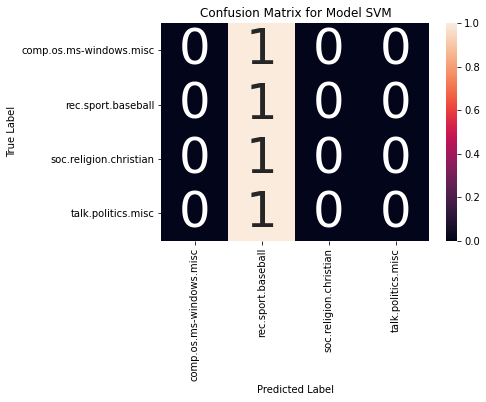

In [158]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, r2_score
cm_svm = confusion_matrix(y_train, predict_train_svm)
cm_svm_norm = cm_svm/cm_svm.sum(axis=1)[:, np.newaxis]
classes = raw_data.target_names
plot_confusion_matrix(cm_svm_norm, classes, title="Confusion Matrix for Model SVM")

## 5- Theorical details

In [ ]:
Confère le rapport